**Exercise 1: (4 points) What type of algorithm would you use to segment a company customers database into
multiple groups?**

You would use an unsupervised learning algorithm. More specifically, you would use a clustering algorithm (example: k-means clustering) to segment the customers into multiple groups.

**Exercise 2: (4 points) Would you frame the problem of spam detection as a supervised learning problem or
an unsupervised learning problem? Explain.**

I would you frame the problem of spam detection as a supervised learning problem. I think this because you would have to feed it emails along with their labels and then create a model to predict the model. The set up would be similar to in class assignments where you define your inputs (x values) and your target (y values). In this case, our target would be spam or not spam and our inputs would be the other data of our emails in the data set (ex- email address, character count, spelling accuracy, etc). Then you would split the data into train and test in order to train/test our model that would be used to predict whether the email is spam or not.

**Exercise 3: (4 points) What is a test set, and why would you want to use it?**

A test set is a separate data set from our training data set that is used to evaluate our models. For our in class assignments, we used an 80-20 split of our data to create our training and test sets (test being the 20% portion). Since our training set is used to build/train our model, we need a separate chunk of data to test our model on and thats where our test set comes in. Since it has been kept separate, it allows us to get an unbiased measure of the performance of our model.

**Exercise 4: (4 points) You are training a classification model with 100 variables/features that achieves 95%
accuracy in the training dataset. However, when you run it in the test dataset, you only get 60%
accuracy. Which of the following options are valid approached to solve this problem?**

- (a) Reduce the number of input variables/features
- (b) Add extra variables/features
- (c) Implement cross-validation during the training process
- (d) Select another algorithm
- (e) (a) and (c)
- (f) (a) and (d)
- (g) (b) and (c)
- (h) (b) and (d)
- (i) None of the above

(E) (A and C) It looks like the model is overfitting to the training data set. Of the options available, I would say that implementing cross validation and reducing the number of input variables/features would be the best approach to solve this problem. Overfitting often happens when the algorithm is too complex, so to make it simpler, we remove some variables (carefully) to reduce noise and hopefully stop the model from overfitting. Implementing cross validation during the training process would allow us to prevent overfitting because it splits our training set into multiple smaller training sets. This allows us to tune our parameters off of our different test sets and get more accurate results.

**Exercise 5: Consider the Real Estate.csv data file posted on Blackboard (under the In-Class 3f assignment
link). This file contains information related to 414 houses. The goal is to predict the house price
of unit area. In Python, answer the following:**


_(a) (3 points) Using the pandas library, read the csv data file and create a data-frame called
house price._

In [5]:
import boto3
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


_(b) (3 points) Drop the No and transaction date columns._

In [6]:
## dropping No and transaction date columns
house_price = house_price.drop(columns = ['No','transaction_date'],axis=1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


_(c) (4 points) Split the data-frame into two data-frames: train (80%) and test (20%)._

In [10]:
## defining the input and target
X = house_price.drop(columns='house_price_of_unit_area',axis=1)
Y = house_price['house_price_of_unit_area']

## splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

_(d) (10 points) Using the train data-frame, build a linear regression model in which: house age,
distance to the nearest MRT station, number of convenience stores, latitude, and
longitude are the input variables, and house price of unit area is the target variable.
After the model is built, predict the house price of unit area of a the houses in the test
data-frame. Report the MSE._

In [11]:
X_train_1 = X_train[['house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude']]
X_test_1 = X_test[['house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude']]
# building linear model
lm_md1 = LinearRegression().fit(X_train_1,Y_train)

# predict on test
lm_md1_pred = lm_md1.predict(X_test_1)
lm_md1_pred

# compute model mse
mse1 = np.mean((Y_test-lm_md1_pred)**2)
print("The MSE of model 1 is",mse1)

The MSE of model 1 is 81.8773456496947


_(e) (10 points) Using the train data-frame, build a linear regression model in which: house age,
number of convenience stores, latitude, and longitude are the input variables, and
house price of unit area is the target variable. After the model is built, predict the house
price of unit area of a the houses in the test data-frame. Report the MSE._


In [12]:
X_train_2 = X_train[['house_age','number_of_convenience_stores','latitude','longitude']]
X_test_2 = X_test[['house_age','number_of_convenience_stores','latitude','longitude']]
# building linear model
lm_md2 = LinearRegression().fit(X_train_2,Y_train)

# predict on test
lm_md2_pred = lm_md2.predict(X_test_2)
lm_md2_pred

# compute model mse
mse2 = np.mean((Y_test-lm_md2_pred)**2)
print("The MSE of model 2 is",mse2)

The MSE of model 2 is 92.86145565795476


_(f) (5 points) Using the results from parts (d) and (e), what model would use? Explain._

 Using the results from parts (d) and (e), I would use the model from part (d) because the MSE is lower. We want the lower MSE because it means our predictions are closer to the actual values on average.

_(g) (15 points) Repeat steps (c) to (e) 100 times, and visualize the MSE of each of the models
at each iteration. Which of the two model has better performance on the test datasets? Explain._

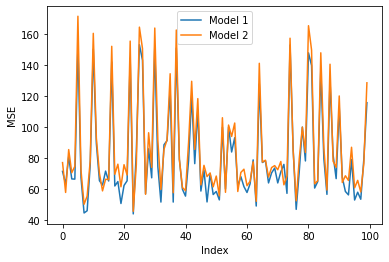

In [30]:
## defining the input and target
X = house_price.drop(columns='house_price_of_unit_area',axis=1)
Y = house_price['house_price_of_unit_area']

## store MSEs from both models
md1_results = []
md2_results = []

## 100 iterations of building both models
for i in range (0,100):
    ## split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)
    
    ## build model 1
    X_train_1 = X_train[['house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude']]
    X_test_1 = X_test[['house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude']]
    # building linear model
    lm_md1 = LinearRegression().fit(X_train_1,Y_train)
    # predict on test
    lm_md1_pred = lm_md1.predict(X_test_1)
    # compute model mse
    mse1 = np.mean((Y_test-lm_md1_pred)**2)
    md1_results.append(mse1)
    
    ## build model 2
    X_train_2 = X_train[['house_age','number_of_convenience_stores','latitude','longitude']]
    X_test_2 = X_test[['house_age','number_of_convenience_stores','latitude','longitude']]
    # building linear model
    lm_md2 = LinearRegression().fit(X_train_2,Y_train)
    # predict on test
    lm_md2_pred = lm_md2.predict(X_test_2)
    # compute model mse
    mse2 = np.mean((Y_test-lm_md2_pred)**2)
    md2_results.append(mse2)

# visualize MSE of each iteration
import matplotlib.pyplot as plt

index=np.linspace(0,99,num=100)
plt.plot(index,md1_results, label = 'Model 1')
plt.plot(index,md2_results, label = 'Model 2')
plt.xlabel('Index')
plt.ylabel('MSE')
plt.legend()
plt.show()
    

Model 1 (the model from part (d)) clearly has the better performance on the test data sets. Apart from a few iterations, Model 1's MSE appears to be consistently lower than Model 2's MSE based on the visualization. Because Model 1's MSE appears to be consistently lower, it had better performance on the test data sets.